In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [158]:
# banana = 0
# apple = 1

def generate_data(N):
    std = 0.8

    bananas_width = np.random.normal(4, std, N)
    bananas_length = np.random.normal(8, std, N)

    apples_width = np.random.normal(6, std, N)
    apples_length = np.random.normal(6, std, N)

    width = np.concatenate((bananas_width, apples_width))
    length = np.concatenate((bananas_length, apples_length))

    X = np.array([width, length]).T

    bananas_label = np.zeros(N, dtype='int')
    apples_label = np.ones(N, dtype='int')

    Y = np.concatenate((bananas_label, apples_label))

    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    X = (X - mu ) / sigma
    
    return X, Y

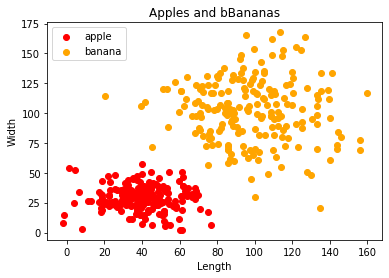

In [159]:
plt.xlabel('Length')
plt.ylabel('Width')

plt.scatter(X[:n, 0], X[:n, 1], c='red', marker='o', label='apple')
plt.scatter(X[n:, 0], X[n:, 1], c='orange', marker='o', label='banana')
plt.title('Apples and bBananas')
plt.legend()

In [160]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
    
    # train
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.number_classes = len(np.unique(y_train))
        
    def euclidianDistance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def nearNeighbors(self, X_test):
        point_dist = []
        for x_test in X_test:
            point_dist.append(self.euclidianDistance(x_test, self.X_train))

        neigh_ind = []
        for row in point_dist:
            near_neighbors = np.argsort(row)[:self.k]
            neigh_ind.append(near_neighbors)

        return np.array(neigh_ind)
    
    # test
    def predict(self, X_test):
        neighbors = self.nearNeighbors(X_test)
        y_pred = []
        for neighbor in neighbors:
            y_pred.append(np.argmax(np.bincount(self.y_train[neighbor])))
        return np.array(y_pred)
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        evaluatation = (y_pred == y_test).sum() / len(y_test)
        return evaluatation

In [161]:
N = 100
X_train, y_train = generate_data(N)


In [162]:
knn = KNearestNeighbors(k=5)
knn.fit(X_train, y_train)
N = 200
X_test, y_test = generate_data(N)

In [163]:
knn.evaluate(X_test, y_test)

0.93

In [164]:
tick = time.time()
y_pred = knn.predict(X_test)
tock = time.time()

print(y_pred)
print(round(tock - tick, 5), 'seconds')

[0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
0.037 seconds


In [165]:
moz_moz = 0
moz_sib = 0
sib_moz = 0
sib_sib = 0

for i in range(len(y_test)):
    if y_test[i] == 0 and y_pred[i] == 0:
        moz_moz += 1
    if y_test[i] == 0 and y_pred[i] == 1:
        moz_sib += 1
    if y_test[i] == 1 and y_pred[i] == 0:
        sib_moz += 1
    if y_test[i] == 1 and y_pred[i] == 1:
        sib_sib += 1
        
conf_mat = np.array([[moz_moz, moz_sib], [sib_moz, sib_sib]])
print(conf_mat)

[[182  18]
 [ 10 190]]


In [166]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)

evaluatation = (y_pred == y_test).sum() / len(y_test)
print(evaluatation)

0.93
